In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import seaborn as sns
import matplotlib.pyplot as plt
from timeit import default_timer as timer

%matplotlib inline

In [2]:
pd.set_option('display.max_colwidth', -1)

/Users/chebian/opt/anaconda3/envs/Python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [3]:
from IPython.display import Image
from IPython.core.display import HTML
def path_to_image_html(path):
    return '<img src="'+ path + '" style=max-height:200px;"/>'


# Gather Data

#### Loading Twitter Archive File

In [4]:
twitter_archive= pd.read_csv('twitter-archive-enhanced (1).csv')

#### Loading Image Predictions File

In [5]:
df_image_prediction = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', sep = '\t')

In [6]:
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Twitter API

In [5]:
#consumer_key = ' '
#consumer_secret=' '
#access_token = '  '
#access_secret= ''
#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth)


In [ ]:
#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)

#count = 0
#fails_dict = {}
#start = timer()
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
        #count += 1
        #print(str(count) + ": " + str(tweet_id))
        #try:
            #tweet = api.get_status(tweet_id, tweet_mode='extended')
            #print("Success")
            #json.dump(tweet._json, outfile)
            #outfile.write('\n')
        #except tweepy.TweepError as e:
            #print("Fail")
            #fails_dict[tweet_id] = e
            #pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [ ]:
#tweet_info.to_json(r'tweet_json.txt')
#tweet_info.to_json('tweet_info.json')
#tweet_info.to_csv('tweet_info.csv', index=False)

#### Loading Image Predictions File

In [7]:
df_tweet_info = pd.read_csv('tweet_info.csv')

# Assess Data

In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [10]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
twitter_archive.duplicated().sum()

0

In [12]:
# check unusual volume for names
twitter_archive['name'].value_counts()

None          745
a             55 
Charlie       12 
Cooper        11 
Oliver        11 
              .. 
Fiji          1  
Jordy         1  
Chesterson    1  
Pip           1  
Coopson       1  
Name: name, Length: 957, dtype: int64

In [13]:
# checking inregular rating denominator
twitter_archive['rating_denominator'].value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [14]:
# Count rows with invalid denominator
twitter_archive.query('rating_denominator!=10')['tweet_id'].count()

23

#### Assess Image Prediction Data

In [15]:
df_image_prediction 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [16]:
df_image_prediction.duplicated().sum()

0

In [17]:
df_image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Asses Twitter Info Dataset

In [19]:
df_tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2331 non-null   object 
 1   id                             2331 non-null   int64  
 2   id_str                         2331 non-null   int64  
 3   full_text                      2331 non-null   object 
 4   truncated                      2331 non-null   bool   
 5   display_text_range             2331 non-null   object 
 6   entities                       2331 non-null   object 
 7   extended_entities              2059 non-null   object 
 8   source                         2331 non-null   object 
 9   in_reply_to_status_id          77 non-null     float64
 10  in_reply_to_status_id_str      77 non-null     float64
 11  in_reply_to_user_id            77 non-null     float64
 12  in_reply_to_user_id_str        77 non-null     f

In [20]:
df_tweet_info.duplicated().sum()

0

In [21]:
df_tweet_info.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,quoted_status_id,quoted_status_id_str
count,2.331000e+03,2.331000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,0.0,0.0,0.0,2331.000000,2331.000000,2.600000e+01,2.600000e+01
mean,7.419079e+17,7.419079e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,NaN,NaN,NaN,2709.776920,7576.232089,8.113972e+17,8.113972e+17
std,6.823170e+16,6.823170e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,NaN,NaN,NaN,4582.884425,11758.640195,6.295843e+16,6.295843e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,1.000000,0.000000,6.721083e+17,6.721083e+17
25%,6.782670e+17,6.782670e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,NaN,NaN,NaN,548.500000,1320.000000,7.761338e+17,7.761338e+17
50%,7.182469e+17,7.182469e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1271.000000,3297.000000,8.281173e+17,8.281173e+17
75%,7.986692e+17,7.986692e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3148.000000,9276.000000,8.637581e+17,8.637581e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,77999.000000,156526.000000,8.860534e+17,8.860534e+17


In [22]:
df_tweet_info

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Sun Nov 15 22:32:08 +0000 2015,666020888022790149,666020888022790149,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666020881337073664, 'id_str': '666020881337073664', 'indices': [108, 131], 'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'url': 'https://t.co/BLDqew2Ijj', 'display_url': 'pic.twitter.com/BLDqew2Ijj', 'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 960, 'h': 720, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 960, 'h': 720, 'resize': 'fit'}, 'small': {'w': 680, 'h': 510, 'resize': 'fit'}}}]}","{'media': [{'id': 666020881337073664, 'id_str': '666020881337073664', 'indices': [108, 131], 'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'url': 'https://t.co/BLDqew2Ijj', 'display_url': 'pic.twitter.com/BLDqew2Ijj', 'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 960, 'h': 720, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 960, 'h': 720, 'resize': 'fit'}, 'small': {'w': 680, 'h': 510, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666029276303482880, 'id_str': '666029276303482880', 'indices': [116, 139], 'media_url': 'http://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg', 'url': 'https://t.co/r7mOb2m0UI', 'display_url': 'pic.twitter.com/r7mOb2m0UI', 'expanded_url': 'https://twitter.com/dog_rates/status/666029285002620928/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 768, 'h': 1024, 'resize': 'fit'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}, 'large': {'w': 768, 'h': 1024, 'resize': 'fit'}}}]}","{'media': [{'id': 666029276303482880, 'id_str': '666029276303482880', 'indices': [116, 139], 'media_url': 'http://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg', 'url': 'https://t.co/r7mOb2m0UI', 'display_url': 'pic.twitter.com/r7mOb2m0UI', 'expanded_url': 'https://twitter.com/dog_rates/status/666029285002620928/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 768, 'h': 1024, 'resize': 'fit'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}, 'large': {'w': 768, 'h': 1024, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666033409081393153, 'id_str': '666033409081393153', 'indices': [107, 130], 'media_url'

#### Quality 
There are many quality and tidiness issue in the three dataset; however, not all of them will affect my analysis. 

I will only include issues that are key to my analysis.

#### twitter_archive


Sometimes the names are messed up such as ‘None’, ‘a’

Incorrect data type for retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id, in_reply_to_user_id. Should be object rather then float. 

Incorrect datatype for timestamp and retweeted_status_timestamp. They should be date time. 


Denominator should always be 10 according to the guideline. There are about 23 rows of data have denominators that are not 10. 

Text column has url included, I will seperate them into two columns
Column such as p1, p2, p3, p1_conf are confusing.
#### image_prediction 
Missing elements: in the twitter archive file, there are 2357 rows. Here in the image prediction file, there are only 2075. Around 180 rows are missing. 

Minor capitalization erros: in column p1,p2,p3, some breed are capitalized while some are not.

Breed names are hyphenated. I will replace them with space.

#### twitter_info
twitter_id is showed as id, name has to be changed before merging tables

id should be object rather than integer

#### Tidiness

9. We should combine all three dataset into one data frame. 
10. Some element are not necessary for our analysis such as retweeted_status_id, retweested_user_id. 


> Issues:
> >Incorrect datatype for timestamp and retweeted_status_timestamp. They should be date time. 


In [23]:
## Incorrect data type for retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id,
##in_reply_to_user_id. Should be object rather then float.
twitter_archive['tweet_id'] = twitter_archive['tweet_id'].astype('str')
twitter_archive['in_reply_to_status_id'] = twitter_archive['in_reply_to_status_id'].astype('str')
twitter_archive['in_reply_to_user_id'] = twitter_archive['in_reply_to_user_id'].astype('str')

In [24]:
## Incorrect datatype for timestamp and retweeted_status_timestamp. They should be date time.
twitter_archive['timestamp'] = twitter_archive['timestamp'].astype('datetime64[ns]')
twitter_archive['retweeted_status_timestamp'] = twitter_archive['retweeted_status_timestamp'].astype('datetime64[ns]')

> Issues:
>>  We should combine all three dataset into one data frame. 
> > Some element are not necessary for our analysis such as retweeted_status_id, retweested_user_id. 

In [25]:
## 10.Some element are not necessary for our analysis such as retweeted_status_id, retweested_user_id.
df_clean = twitter_archive[['tweet_id', 'timestamp','text','rating_numerator','rating_denominator','name']]
df1 = df_image_prediction.drop(columns = 'img_num')
df2 = df_tweet_info[['id','favorite_count','retweet_count']]

In [26]:
df_clean['tweet_id']=df_clean['tweet_id'].astype('str')

/Users/chebian/opt/anaconda3/envs/Python/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df1['tweet_id']= df1['tweet_id'].astype('str')

> Issue
>> twitter_id is showed as id in the twittwe_info file, name has to be changed before merging tables

In [28]:
df2 = df2.rename(columns = {'id':'tweet_id'})

In [29]:
df2['tweet_id'] = df2['tweet_id'].astype('str')

> Issues:
>> Incorrect data type for retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id, in_reply_to_user_id. Should be object rather then float. 

In [30]:
df_clean = pd.merge(df_clean, df1, how = 'inner', on='tweet_id')

In [31]:
df_clean = pd.merge(df_clean, df2, how = 'inner', on='tweet_id')

In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2059 non-null   object        
 1   timestamp           2059 non-null   datetime64[ns]
 2   text                2059 non-null   object        
 3   rating_numerator    2059 non-null   int64         
 4   rating_denominator  2059 non-null   int64         
 5   name                2059 non-null   object        
 6   jpg_url             2059 non-null   object        
 7   p1                  2059 non-null   object        
 8   p1_conf             2059 non-null   float64       
 9   p1_dog              2059 non-null   bool          
 10  p2                  2059 non-null   object        
 11  p2_conf             2059 non-null   float64       
 12  p2_dog              2059 non-null   bool          
 13  p3                  2059 non-null   object      

> Issues:
>> column such as p1, p2, p3, p1_conf are confusing.

In [33]:
df_clean = df_clean.rename(columns = {'p1':'breed1','p2':'breed2','p3':'breed3'})
df_clean = df_clean.rename(columns = {'p1_conf':'breed1_confidence',
                                       'p2_conf':'breed2_confidence',
                                       'p3_conf':'breed3_confidence'})
df_clean = df_clean.rename(columns = {'p1_dog':'breed1_bool',
                                       'p2_dog':'breed2_bool',
                                       'p3_dog':'breed3_bool'})


> Issues
>> Denominator should always be 10 according to the guideline. There are about 23 rows of data have denominators that are not 10. 

In [34]:
df_clean['rating_denominator'].value_counts()

10     2041
50     3   
11     2   
80     2   
7      1   
170    1   
150    1   
130    1   
120    1   
110    1   
90     1   
70     1   
40     1   
20     1   
2      1   
Name: rating_denominator, dtype: int64

In [35]:
## dropping rows with incorrect denominator 
df_clean = df_clean.query('rating_denominator==10')

> Issues
>> Minor capitalization erros: in column p1,p2,p3, some breed are capitalized while some are not.

>> Breed names are hyphenated. I will replace them with space.


In [36]:
df_clean['breed1'] = df_clean['breed1'].str.replace('_', ' ').str.title()
df_clean['breed2'] = df_clean['breed2'].str.replace('_', ' ').str.title()
df_clean['breed3'] = df_clean['breed3'].str.replace('_', ' ').str.title()


In [37]:
df_clean[['breed1','breed2','breed3']]

,breed1,breed2,breed3
0,Orange,Bagel,Banana
1,Chihuahua,Pekinese,Papillon
2,Chihuahua,Malamute,Kelpie
3,Paper Towel,Labrador Retriever,Spatula
4,Basset,English Springer,German Short-Haired Pointer
...,...,...,...
2054,Miniature Pinscher,Rottweiler,Doberman
2055,Rhodesian Ridgeback,Redbone,Miniature Pinscher
2056,German Shepherd,Malinois,Bloodhound
2057,Redbone,Miniature Pinscher,Rhodesian Ridgeback


> Issue
>>Text column has url included, I will seperate them into two columns


In [38]:
## Creating New Columns for Seperation
df_clean[['text','tweet_url','None']]= df_clean['text'].str.split('https://', expand = True)

In [39]:
df_clean = df_clean.drop(columns = ['None'])

In [40]:
df_clean['temp'] = 'https://'

In [41]:
df_clean['twitter_url'] = df_clean['temp']+df_clean['tweet_url']

In [42]:
df_clean = df_clean.drop(columns = ['tweet_url'])

In [43]:
df_clean[['text','twitter_url']]

,text,twitter_url
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://t.co/MgUWQ76dJU
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://t.co/0Xxu71qeIV
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://t.co/wUnZnhtVJB
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://t.co/tD36da7qLQ
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",https://t.co/AtUZn91f7f
...,...,...
2054,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,https://t.co/4B7cOc1EDq
2055,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,https://t.co/DWnyCjf2mx
2056,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,https://t.co/y671yMhoiR
2057,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,https://t.co/r7mOb2m0UI


> Issue
>> Incorrect datatype for timestamp and retweeted_status_timestamp. They should be datetime. 


In [44]:
df_clean['timestamp'] = df_clean['timestamp'].astype('datetime64[ns]')

In [45]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2041 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2041 non-null   object        
 1   timestamp           2041 non-null   datetime64[ns]
 2   text                2041 non-null   object        
 3   rating_numerator    2041 non-null   int64         
 4   rating_denominator  2041 non-null   int64         
 5   name                2041 non-null   object        
 6   jpg_url             2041 non-null   object        
 7   breed1              2041 non-null   object        
 8   breed1_confidence   2041 non-null   float64       
 9   breed1_bool         2041 non-null   bool          
 10  breed2              2041 non-null   object        
 11  breed2_confidence   2041 non-null   float64       
 12  breed2_bool         2041 non-null   bool          
 13  breed3              2041 non-null   object      

In [46]:
df_clean.to_csv('WeRateDogClean', index = False)

### Highest Rated Dog

In [47]:
df_clean['score']= df_clean['rating_numerator']/df_clean['rating_denominator']
df_clean.sort_values( by = ['score'],ascending = False).head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,jpg_url,breed1,breed1_confidence,breed1_bool,...,breed2_confidence,breed2_bool,breed3,breed3_confidence,breed3_bool,favorite_count,retweet_count,temp,twitter_url,score
789,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af. 1776/10,1776,10,Atticus,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,Bow Tie,0.533941,False,...,0.080822,False,Sunglass,0.050776,False,5144,2477,https://,https://t.co/GRXwMxLBkh,177.6


In [48]:
Image(url= 'https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg')

### Least Rated Dog

In [49]:
df_clean.sort_values( by = ['score'],ascending = True)['jpg_url'].head(1)

819    https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg
Name: jpg_url, dtype: object

In [50]:
df_clean.sort_values( by = ['score'],ascending = True).head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,jpg_url,breed1,breed1_confidence,breed1_bool,...,breed2_confidence,breed2_bool,breed3,breed3_confidence,breed3_bool,favorite_count,retweet_count,temp,twitter_url,score
819,746906459439529985,2016-06-26 03:22:31,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment",0,10,None,https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg,Traffic Light,0.470708,False,...,0.199776,False,Space Shuttle,0.064807,False,2903,296,https://,https://t.co/c7WXaB2nqX,0.0


In [51]:
Image(url= 'https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg')

### Breed with the Most Accurate Predicition

In [52]:
df_accuracy = df_clean.groupby('breed1')['breed1_bool'].sum().sort_values(ascending = False).rename_axis('breed').reset_index(name = 'correct')

In [53]:
a = df_clean.groupby('breed1')['breed1'].count().sort_values(ascending = False).sort_values(ascending = False).rename_axis('breed').reset_index(name = 'total')

In [54]:
df_accuracy = pd.merge(df_accuracy, a, how = 'inner', on='breed')
df_accuracy['accuracy'] = df_accuracy['correct']/df_accuracy['total']

In [55]:
df_accuracy['total'].describe()

count    378.000000
mean     5.399471  
std      12.367781 
min      1.000000  
25%      1.000000  
50%      2.000000  
75%      4.750000  
max      146.000000
Name: total, dtype: float64

In [56]:
accurate_breed = df_accuracy.sort_values(by = 'accuracy',ascending = False)[['breed','accuracy','total']].query('accuracy == 1 & total > 30 ')

In [57]:
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [58]:
df_accuracy['accuracy'].describe()

count    378.000000
mean     0.293651  
std      0.456037  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000  
Name: accuracy, dtype: float64

Text(0.5, 1.0, 'Prediction Accuracy Distribution')

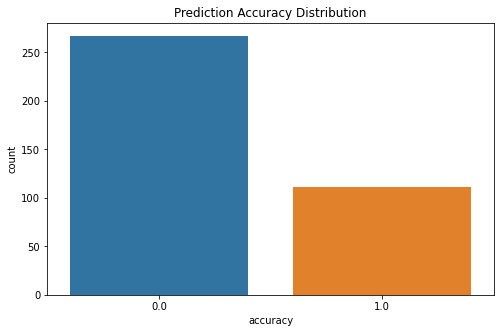

In [59]:
plt.figure(figsize=[8,5])
sb.countplot(data = df_accuracy, x='accuracy')
plt.title('Prediction Accuracy Distribution')

(Text(0.5, 1.0, 'Prediction Accuracy by Breed'),)

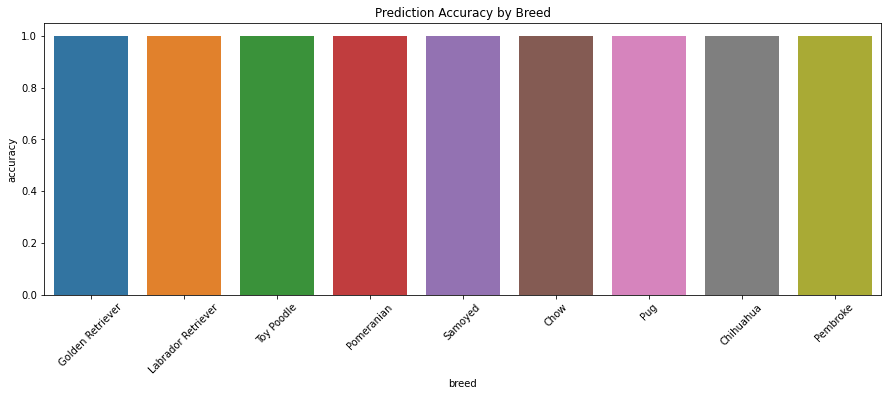

In [60]:
plt.figure(figsize=[15,5])
sb.barplot(data = accurate_breed, x ='breed',y='accuracy')
plt.xticks(rotation = 45)
plt.title('Prediction Accuracy by Breed'),

### Most Liked Puppy

In [61]:
## Access to the most favorite tweet
df_clean.sort_values(by = 'favorite_count', ascending = False )['text'].head(1)

838    Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) 
Name: text, dtype: object

In [62]:
df_clean.sort_values(by = 'favorite_count', ascending = False )['twitter_url'].head(1)

838    https://t.co/7wE9LTEXC4
Name: twitter_url, dtype: object

In [63]:
df_clean.sort_values(by = 'favorite_count', ascending = False ).head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,jpg_url,breed1,breed1_confidence,breed1_bool,...,breed2_confidence,breed2_bool,breed3,breed3_confidence,breed3_bool,favorite_count,retweet_count,temp,twitter_url,score
838,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad),13,10,None,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,Labrador Retriever,0.825333,True,...,0.044681,False,Whippet,0.018442,True,156526,77999,https://,https://t.co/7wE9LTEXC4,1.3


In [64]:
Image(url= 'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg')